In [1]:
%matplotlib inline
import tensorflow as tf
from my_tf_layer import *
from PIL import Image
import numpy as np

from time import gmtime,strftime


seed = 15  # random seed
random.seed(seed)

nchannel = 1
crop_size = 512
batch = 1

data = tf.placeholder(tf.float32, [batch, crop_size,crop_size,nchannel])
label =  tf.placeholder(tf.int32, [1, crop_size,crop_size])
expected = tf.expand_dims(label, -1)
device = '/gpu:0'

out_size = 64
conv1_1 = conv2d_layer(data,3,out_size,name = 'conv1_1')
conv1_1 = batch_norm_layer(conv1_1,name = 'conv1_1_bn')

out_size = 64
conv1_2 = conv2d_layer(conv1_1,3,out_size,name = 'conv1_2')
conv1_2 = batch_norm_layer(conv1_2,name = 'conv1_2_bn')

out_size = 128
conv1_3 = conv2d_layer(conv1_2,3,out_size,name = 'conv1_3')
conv1_3 = batch_norm_layer(conv1_2,name = 'conv1_3_bn')

# pool1
pool1 = pool_layer(conv1_3,name='pool1')

out_size = 64
conv2_1 = conv2d_layer(pool1,3,out_size,name = 'conv2_1')
conv2_1 = batch_norm_layer(conv2_1,name = 'conv2_1_bn')

out_size = 128
conv2_2 = conv2d_layer(conv2_1,3,out_size,name = 'conv2_2')
conv2_2 = batch_norm_layer(conv2_2,name = 'conv2_2_bn')

out_size = 128
conv2_3 = conv2d_layer(conv2_2,3,out_size,name = 'conv2_3')
conv2_3 = batch_norm_layer(conv2_3,name = 'conv2_3_bn')

pool2 = pool_layer(conv2_3,name='pool2')

out_size = 64
conv3_1 = conv2d_layer(pool2,3,out_size,name = 'conv3_1')
conv3_1 = batch_norm_layer(conv3_1,name = 'conv3_1_bn')

out_size = 128
conv3_2 = conv2d_layer(conv3_1,3,out_size,name = 'conv3_2')
conv3_2 = batch_norm_layer(conv3_2,name = 'conv3_2_bn')

out_size = 128
conv3_3 = conv2d_layer(conv3_2,3,out_size,name = 'conv3_3')
conv3_3 = batch_norm_layer(conv3_3,name = 'conv3_3_bn')

# un pooling layer
un_pool2 = up_pool_deconv_layer(conv3_3,2,name = 'unpool2')

out_size = 64
conv4_1 = conv2d_layer(un_pool2,3,out_size,name = 'conv4_1')
conv4_1 = batch_norm_layer(conv4_1,name = 'conv4_1_bn')

out_size = 128
conv4_2 = conv2d_layer(conv4_1,3,out_size,name = 'conv4_2')
conv4_2 = batch_norm_layer(conv4_2,name = 'conv4_2_bn')

out_size = 128
conv4_3 = conv2d_layer(conv4_2,3,out_size,name = 'conv4_3')
conv4_3 = batch_norm_layer(conv4_3,name = 'conv4_3_bn')

un_pool1 = up_pool_deconv_layer(conv4_3,2,name='unpool1')

out_size = 64
conv5_1 = conv2d_layer(un_pool1,3,out_size,name = 'conv5_1')
conv5_1 = batch_norm_layer(conv5_1,name = 'conv5_1_bn')

out_size = 128
conv5_2 = conv2d_layer(conv5_1,3,out_size,name = 'conv5_2')
conv5_2 = batch_norm_layer(conv5_2,name = 'conv5_2_bn')

out_size = 128
conv5_3 = conv2d_layer(conv5_2,3,out_size,name = 'conv5_3')
conv5_3 = batch_norm_layer(conv5_3,name = 'conv5_3_bn')

out_size = 64
conv5_4 = conv2d_layer(conv5_3,3,out_size,name = 'conv5_4')
conv5_4 = batch_norm_layer(conv5_4,name = 'conv5_4_bn')

classes = 2
score = conv2d_layer(conv5_4,1,classes,name='score')

logits = tf.reshape(score,(-1,2))
print 'loghts size: ',logits.get_shape()


cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, tf.reshape(expected, [-1]), name='x_entropy')
print 'cross entropy size: ',cross_entropy.get_shape()
loss = tf.reduce_mean(cross_entropy)

rate = 0.0001
optimize = tf.train.AdamOptimizer(rate,0.5).minimize(loss)
#optimize = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
th = 0.5
prediction = tf.argmax(tf.reshape(tf.nn.softmax(logits), tf.shape(score)), dimension=3,name='prediction')
print 'prediction size: ',prediction.get_shape()
accuracy = tf.div(tf.cast(tf.reduce_sum(prediction+tf.cast(label,tf.int64)),tf.float32),tf.cast(crop_size*crop_size,tf.float32))



sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, "./checkpoint/02-13-52.ckpt")

layer: conv1_1  size: (1, 512, 512, 64)
layer: conv1_2  size: (1, 512, 512, 64)
layer: conv1_3  size: (1, 512, 512, 128)
layer: pool1  size: (1, 256, 256, 64)
layer: conv2_1  size: (1, 256, 256, 64)
layer: conv2_2  size: (1, 256, 256, 128)
layer: conv2_3  size: (1, 256, 256, 128)
layer: pool2  size: (1, 128, 128, 128)
layer: conv3_1  size: (1, 128, 128, 64)
layer: conv3_2  size: (1, 128, 128, 128)
layer: conv3_3  size: (1, 128, 128, 128)
layer: unpool2  size: (1, 256, 256, 128)
layer: conv4_1  size: (1, 256, 256, 64)
layer: conv4_2  size: (1, 256, 256, 128)
layer: conv4_3  size: (1, 256, 256, 128)
layer: unpool1  size: (1, 512, 512, 128)
layer: conv5_1  size: (1, 512, 512, 64)
layer: conv5_2  size: (1, 512, 512, 128)
layer: conv5_3  size: (1, 512, 512, 128)
layer: conv5_4  size: (1, 512, 512, 64)
layer: score  size: (1, 512, 512, 2)
loghts size:  (262144, 2)
cross entropy size:  (262144,)
prediction size:  (1, 512, 512)


NotFoundError: ./checkpoint/02-13-52.ckpt.data-00000-of-00001
	 [[Node: save/RestoreV2_68 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_68/tensor_names, save/RestoreV2_68/shape_and_slices)]]
	 [[Node: save/RestoreV2_168/_573 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_1435_save/RestoreV2_168", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op u'save/RestoreV2_68', defined at:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/lib/python2.7/site-packages/IPython/config/application.py", line 574, in launch_instance
    app.start()
  File "/usr/lib/python2.7/site-packages/IPython/kernel/zmq/kernelapp.py", line 373, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib64/python2.7/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib64/python2.7/site-packages/tornado/ioloop.py", line 865, in start
    handler_func(fd_obj, events)
  File "/usr/lib64/python2.7/site-packages/tornado/stack_context.py", line 274, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib64/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 433, in _handle_events
    self._handle_recv()
  File "/usr/lib64/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 465, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib64/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib64/python2.7/site-packages/tornado/stack_context.py", line 274, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python2.7/site-packages/IPython/kernel/zmq/kernelbase.py", line 252, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python2.7/site-packages/IPython/kernel/zmq/kernelbase.py", line 213, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python2.7/site-packages/IPython/kernel/zmq/kernelbase.py", line 362, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python2.7/site-packages/IPython/kernel/zmq/ipkernel.py", line 181, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2871, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2975, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3035, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-a72fa132717f>", line 118, in <module>
    saver = tf.train.Saver()
  File "/usr/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/usr/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/usr/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 624, in build
    restore_sequentially, reshape)
  File "/usr/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 361, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/usr/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 200, in restore_op
    [spec.tensor.dtype])[0])
  File "/usr/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 441, in restore_v2
    dtypes=dtypes, name=name)
  File "/usr/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): ./checkpoint/02-13-52.ckpt.data-00000-of-00001
	 [[Node: save/RestoreV2_68 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_68/tensor_names, save/RestoreV2_68/shape_and_slices)]]
	 [[Node: save/RestoreV2_168/_573 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_1435_save/RestoreV2_168", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [ ]:
train_list = '/home/qinshuo/WorkPlace/caffe_space/seg_spine/spine_list/train_list.txt'
path = '/media/D/SpineDataset/spine_seg'
train_data = []
with open(train_list,'r') as ff:
    for line in ff:
        train_data.append([path+vv for vv in line.split()])
print train_data[0]

#show_image(read_img(train_data[0][0]),read_img(train_data[0][1]))

    
iter = 0
idx = random.randint(0, len(train_data)-1)
batch_xs = read_image(train_data[idx][0],size=crop_size)
batch_ys = read_label(train_data[idx][1],size=crop_size)
sess.run(optimize,feed_dict = {data: batch_xs,label: batch_ys})
print 'step{} -- accuracy is {}'.format(iter,sess.run(accuracy,feed_dict = {data: batch_xs,label: batch_ys}))

In [ ]:
for iter in range(10000):
    idx = random.randint(0, len(train_data)-1)
    rotate = 0  #random.randint(0,360)
    batch_xs = read_image(train_data[idx][0],size=crop_size)
    batch_ys = read_label(train_data[idx][1],size=crop_size)
    sess.run(optimize,feed_dict = {data: batch_xs,label: batch_ys})
    if (iter+1)%200 == 0:
        print '{}-step{} -- accuracy is {}'.format(strftime("%a, %d %b %Y %H:%M:%S", gmtime()),iter+1,sess.run(accuracy,feed_dict = {data: batch_xs,label: batch_ys}))
    if (iter+1)%5000 == 0:
        save_path = strftime("checkpoint/%H-%M-%S.ckpt",gmtime())
        saver = tf.train.Saver()
        save_path = saver.save(sess,save_path)
        print("Model saved in file: %s" % save_path)
        ss = prediction.eval(session = sess,feed_dict = {data: batch_xs,label: batch_ys})
        ss2 = ss.reshape(-1,crop_size,crop_size)
        #show_image(ss2[0],batch_ys)
print "iteration done!"

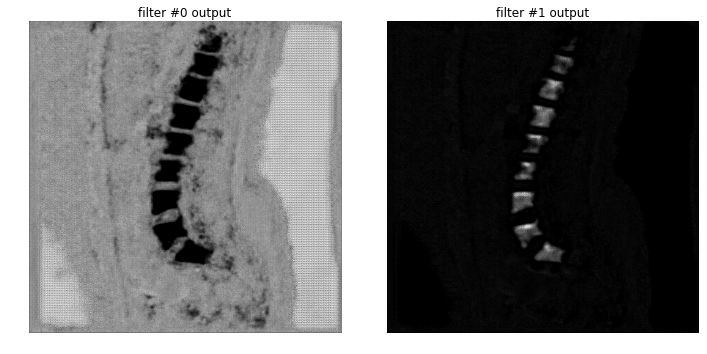

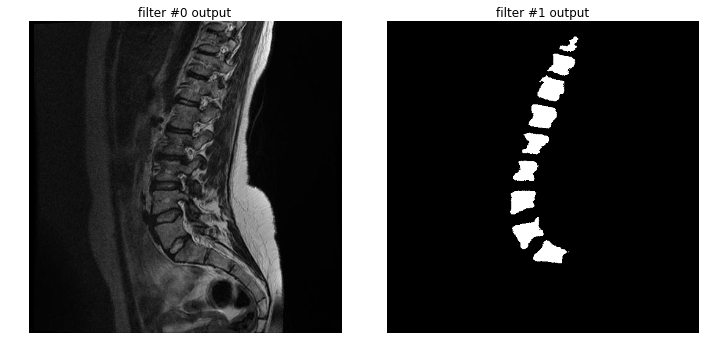

In [6]:
batch_xs = read_image(train_data[10][0],size=crop_size)
layer = np.squeeze(sess.run(score,feed_dict = {data:batch_xs}))
show_image(layer[:,:,0],layer[:,:,1])
show_image(batch_xs,sess.run(prediction,feed_dict = {data:batch_xs}))